In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
from glob import glob 
from fastcore.xtras import load_pickle

import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(['science', 'nature'])

import matplotx

import pandas as pd 
import numpy as np

%matplotlib inline

In [3]:
all_res = glob('out/**/*.pkl')

In [4]:
compiled_res = []
compiled_gpr = []

for res in all_res:
    loaded = load_pickle(res)
    repre = loaded['representation']
    num_points = loaded['num_train_points']

    metrics = {
        'representation': loaded['representation'],
        'num_train_points': loaded['num_train_points'],
        'mae': loaded['mean_absolute_error'],
        'max_error': loaded['max_error'],
        'mse': loaded['mean_squared_error']
    }

    compiled_res.append(metrics)


    gpr_metrics = {
        'num_train_points': loaded['num_train_points'],
        'mae': loaded['gpr_baseline']['mean_absolute_error'],
        'max_error': loaded['gpr_baseline']['max_error'],
        'mse': loaded['gpr_baseline']['mean_squared_error']
    }

    compiled_gpr.append(gpr_metrics)

In [5]:
compiled_res = pd.DataFrame(compiled_res)
compiled_gpr = pd.DataFrame(compiled_gpr)

In [6]:
compiled_grouped_res = compiled_res.groupby(['representation', 'num_train_points']).agg(['mean', 'std'])

In [7]:
compiled_gpr_grouped = compiled_gpr.groupby(['num_train_points']).agg(['mean', 'std'])

In [8]:
compiled_grouped_res

mae           max_error            \
                                     mean       std      mean       std   
representation num_train_points                                           
InChI          10                     NaN       NaN       NaN       NaN   
               50                2.519580  0.127647  8.215000  0.799031   
               100               2.254320  0.290197  7.820000  0.989949   
               200               2.091360  0.092376  7.560000  1.046518   
               500               2.022260  0.024636  7.210000  1.088944   
SELFIES        10                1.995320       NaN  6.790000       NaN   
               50                2.310027  0.039042  8.323333  0.398790   
               100               2.302413  0.234399  8.336667  0.064291   
               200               2.236300  0.028878  8.330000  0.608112   
               500               2.081900  0.097270  7.590000  0.735391   
SMILES         10                2.314952  0.373181  7.062000  1.057270   
               50                2.434410  0.289471  7.577500  1.222903   
               100               2.224450  0.170269  7.947500  0.868193   
               200               2.127080  0.077991  8.096000  0.437184   
               500               1.957750  0.034992  7.087500  0.991543   

                                      mse            
                                     mean       std  
representation num_train_points                      
InChI          10                     NaN       NaN  
               50                9.343423  1.007557  
               100               7.721306  1.954643  
               200               6.646344  0.377881  
               500               6.392757  0.396813  
SELFIES        10                6.026665       NaN  
               50                8.134758  0.171969  
               100               8.288075  1.914147  
               200               7.816975  0.251692  
               500               7.077553  0.345998  
SMILES         10                7.884734  2.514549  
               50                8.914356  1.953383  
               100               7.513040  1.309053  
               200               7.167501  0.416883  
               500               6.190192  0.389149

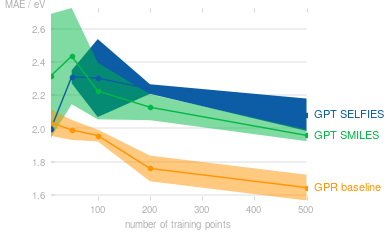

In [9]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(1,1)
    ax.plot(
        compiled_grouped_res.loc["SELFIES", :].index, 
        compiled_grouped_res.loc["SELFIES", :]['mae']['mean'], 
        label='GPT SELFIES', 
        marker='o'
    )

    ax.fill_between(
        compiled_grouped_res.loc["SELFIES", :].index, 
        compiled_grouped_res.loc["SELFIES", :]['mae']['mean'] - compiled_grouped_res.loc["SELFIES", :]['mae']['std'], 
        compiled_grouped_res.loc["SELFIES", :]['mae']['mean'] + compiled_grouped_res.loc["SELFIES", :]['mae']['std'], 
    )

    ax.plot(
        compiled_grouped_res.loc["SMILES", :].index, 
        compiled_grouped_res.loc["SMILES", :]['mae']['mean'], 
        label='GPT SMILES',
        marker='o'
    )

    ax.fill_between(
        compiled_grouped_res.loc["SMILES", :].index, 
        compiled_grouped_res.loc["SMILES", :]['mae']['mean'] - compiled_grouped_res.loc["SMILES", :]['mae']['std'], 
        compiled_grouped_res.loc["SMILES", :]['mae']['mean'] + compiled_grouped_res.loc["SMILES", :]['mae']['std'], 
        alpha=.5
    )

    ax.plot(
        compiled_gpr_grouped.loc[:].index, 
        compiled_gpr_grouped['mae']['mean'], 
        label='GPR baseline',
        marker='o'
    )

    ax.fill_between(
        compiled_gpr_grouped.loc[ :].index, 
        compiled_gpr_grouped.loc[:]['mae']['mean'] - compiled_gpr_grouped.loc[ :]['mae']['std'], 
        compiled_gpr_grouped.loc[ :]['mae']['mean'] + compiled_gpr_grouped.loc[ :]['mae']['std'], 
        alpha=.5
    )

    matplotx.line_labels(fontsize=8)

    ax.set_xlabel('number of training points', labelpad=4)
    matplotx.ylabel_top('MAE / eV')
    #ax.set_xscale('log')

fig.savefig('opv_regression_res.pdf', bbox_inches='tight')
